In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-03-31 15:58:44--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1,36M  7,05MB/s    in 0,2s    

2023-03-31 15:58:44 (7,05 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [148]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

### Data preparation

* Select only the features from above and fill in the missing values with median.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
list(df)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df.total_bedrooms.median())

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
df['rooms_per_household'] = df['total_rooms']/df['households']

In [10]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513


In [11]:
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']

In [12]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892


In [13]:
df['population_per_household'] = df['population']/df['households']

In [14]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

### Ans = `<1H OCEAN`

In [15]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

### $$ Ans = `total\_bedrooms` \,and \,`households` = 0.9743662938 $$ 

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

### Question 3

* Calculate the *mutual information score* between `above_average` and `ocean_proximity` . Use the training set only.
* Round it to 2 decimals using `round(score, 2)`
* What is their *mutual information score*?


Options:
- 0.26
- 0
- 0.10
- 0.16

### $$ Ans = 0.10 $$ 

In [16]:
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [18]:
numerical = ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

                          longitude  latitude  housing_median_age  \
longitude                  1.000000  0.924664            0.108197   
latitude                   0.924664  1.000000            0.011173   
housing_median_age         0.108197  0.011173            1.000000   
total_rooms                0.044568  0.036100            0.361262   
total_bedrooms             0.069120  0.066484            0.319026   
population                 0.099773  0.108785            0.296244   
households                 0.055310  0.071035            0.302916   
median_income              0.015176  0.079809            0.119034   
median_house_value         0.045967  0.144160            0.105623   
rooms_per_household        0.027540  0.106389            0.153277   
bedrooms_per_room          0.081205  0.098619            0.135622   
population_per_household   0.002476  0.002366            0.013191   

                          total_rooms  total_bedrooms  population  households  \
longitude            

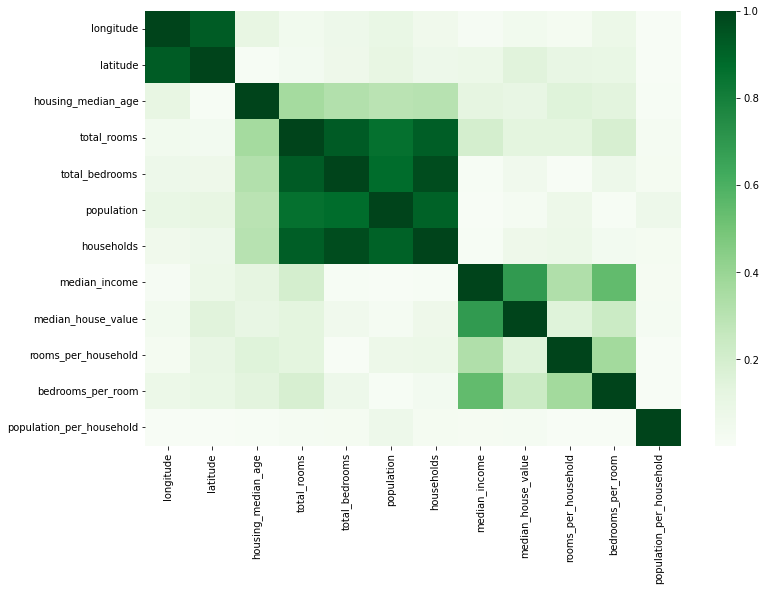

In [26]:
df_temp = df[numerical]
corr_matrix = df_temp.corr().abs()
print(corr_matrix)

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="Greens")

plt.show()

In [33]:
temp = df_temp.corr().unstack().sort_values().drop_duplicates()

In [34]:
temp

longitude           latitude              -0.924664
median_income       bedrooms_per_room     -0.545298
bedrooms_per_room   rooms_per_household   -0.370308
housing_median_age  total_rooms           -0.361262
total_bedrooms      housing_median_age    -0.319026
                                             ...   
population          households             0.907222
total_rooms         households             0.918484
                    total_bedrooms         0.927058
total_bedrooms      households             0.974366
longitude           longitude              1.000000
Length: 67, dtype: float64

In [66]:
df['above_average'] = df.median_house_value > df.median_house_value.mean()
df['above_average'] = df['above_average'].astype(int)

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland,5.045455,0.224625,2.560606,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland,6.114035,0.215208,3.122807,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland,5.205543,0.215173,2.325635,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland,5.329513,0.219892,2.123209,0


In [109]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [110]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [111]:
sum = 12384+4128+4128
print((12384/sum)*100,(4128/sum)*100, (4128/sum)*100 )

60.0 20.0 20.0


In [112]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [113]:
round(mutual_info_score(df_full_train.above_average, df_full_train.ocean_proximity), 2)

0.1

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

## $$ Ans \approx 0.84 $$

In [114]:
list(df)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 'above_average']

In [118]:
categorical = ['ocean_proximity']
numerical  = ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [119]:
list(df_train)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [120]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [121]:
X_train[0]

array([ 2.59713701e-01,  3.74000000e+02,  3.90000000e+01,  3.44300000e+01,
       -1.19670000e+02,  2.36810000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.40400000e+03,
        3.75401070e+00,  3.92245989e+00,  3.81000000e+02,  1.46700000e+03])

In [122]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [124]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [126]:
y_pred = model.predict_proba(X_val)[:, 1]
median_decision = (y_pred >= 0.5)
(y_val == median_decision).mean()

0.8359980620155039

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **Note**: the difference doesn't have to be positive

## $$ Ans = total\_bedrooms  $$

In [ ]:
categorical = ['ocean_proximity']
numerical  = ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [128]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
median_decision = (y_pred >= 0.5)
acc_all_feature = (y_val == median_decision).mean()
acc_all_feature


0.8359980620155039

In [143]:
dv = DictVectorizer(sparse=False)

features = categorical + numerical

diff = []
for exclude_feature in features:

    feature = categorical + numerical
    feature.remove(exclude_feature)
    train_dict = df_train[feature].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[feature].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    median_decision = (y_pred >= 0.5)
    acc = (y_val == median_decision).mean()
    print("Accuracy by excluding the %s feature :%f"%(exclude_feature, acc))
    print("Difference between the original accuracy and accuracy without %s feature is:%f"%(exclude_feature, (acc_all_feature-acc)))
    diff.append([exclude_feature,abs(acc_all_feature-acc)])
    print("=======================================================================================================")


Accuracy by excluding the ocean_proximity feature :0.820252
Difference between the original accuracy and accuracy without ocean_proximity feature is:0.015746
Accuracy by excluding the longitude feature :0.830911
Difference between the original accuracy and accuracy without longitude feature is:0.005087
Accuracy by excluding the latitude feature :0.834545
Difference between the original accuracy and accuracy without latitude feature is:0.001453
Accuracy by excluding the housing_median_age feature :0.830669
Difference between the original accuracy and accuracy without housing_median_age feature is:0.005329
Accuracy by excluding the total_rooms feature :0.837209
Difference between the original accuracy and accuracy without total_rooms feature is:-0.001211
Accuracy by excluding the total_bedrooms feature :0.836240
Difference between the original accuracy and accuracy without total_bedrooms feature is:-0.000242
Accuracy by excluding the population feature :0.826308
Difference between the or

In [144]:
diff

[['ocean_proximity', 0.015746124031007724],
 ['longitude', 0.005087209302325535],
 ['latitude', 0.0014534883720930258],
 ['housing_median_age', 0.005329457364341095],
 ['total_rooms', 0.001211240310077577],
 ['total_bedrooms', 0.00024224806201555982],
 ['population', 0.009689922480620172],
 ['households', 0.0029069767441860517],
 ['median_income', 0.050145348837209336],
 ['rooms_per_household', 0.0004844961240310086],
 ['bedrooms_per_room', 0.0004844961240310086],
 ['population_per_household', 0.002422480620155043]]

In [145]:
data = diff[0][1]
smallest_diff = None
for i in diff:
    if i[1] < data:
        smallest_diff = i
        data = i[1]

print(smallest_diff)

['total_bedrooms', 0.00024224806201555982]


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

## $$ Ans = 0  $$

In [146]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland,5.045455,0.224625,2.560606,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland,6.114035,0.215208,3.122807,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland,5.205543,0.215173,2.325635,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland,5.329513,0.219892,2.123209,0


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

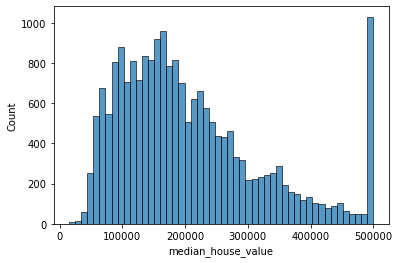

In [147]:
sns.histplot(df.median_house_value, bins=50)

The rmse for alpha = 0 is 0.524000
The rmse for alpha = 0.01 is 0.524000
The rmse for alpha = 0.1 is 0.524000
The rmse for alpha = 1 is 0.524000
The rmse for alpha = 10 is 0.524000


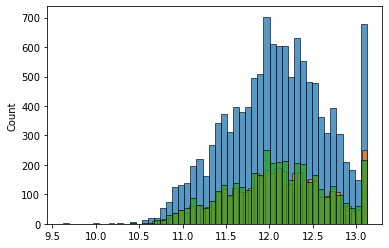

In [158]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Transform the output to the log scale
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values) 

sns.histplot(y_train, bins=50)
sns.histplot(y_val, bins=50)
sns.histplot(y_test, bins=50)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

dv = DictVectorizer(sparse=False)

categorical = ['ocean_proximity']
numerical  = ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

alpha = [0, 0.01, 0.1, 1, 10]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

for a in alpha:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print("The rmse for alpha = %s is %f"%(a, round(rmse(y_val, y_pred), 3)))

In [160]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1h_ocean,3.922460,0.259714,3.754011
8817,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,near_ocean,7.564516,0.130228,2.789082
19686,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,inland,3.908012,0.234624,2.540059
3545,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1h_ocean,5.201093,0.194158,2.059016
17019,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,near_ocean,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...,...
5606,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,<1h_ocean,3.748996,0.305838,1.909639
16339,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,inland,5.720486,0.171472,3.956597
14965,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1h_ocean,5.549834,0.182879,3.242525
11117,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,<1h_ocean,4.414286,0.229126,2.085714
